In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

In [2]:
data = pd.read_csv('/content/Subscribers.csv')

In [3]:
data.shape

(67034, 51)

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V42,V43,V44,V45,V46,V47,V48,V49,V50,Subscribers
0,-0.211875,743952.92,743952.92,200000.0,743952.92,200000.000,200000.0,-0.069396,943952.92,0.00,...,1.034232e+06,1966.57,1990.82,1752.89,100000.0,147.0,1826.046667,28.0,2557.22,0.0
1,0.241488,11295310.87,8034290.99,32000.0,8034290.99,18000.000,14000.0,0.167411,7508345.76,1160925.13,...,5.665658e+07,49957.65,11104.54,17711.99,38000.0,19.0,26467.683330,19.0,12807.07,0.0
2,0.459032,20363.68,317922.94,1650000.0,317922.94,1650000.000,1650000.0,46.068404,1655168.31,0.00,...,2.654720e+04,453.96,9.64,58.83,45072.0,0.0,315.506667,0.0,32.12,1.0
3,0.000000,856120.91,856120.91,0.0,856120.91,45554.885,0.0,0.000000,856120.91,0.00,...,8.506973e+05,2045.09,2045.09,2011.19,45072.0,30.0,2045.090000,19.0,2029.79,0.0
4,8.270783,194485.64,412330.33,835000.0,412330.33,835000.000,835000.0,-0.272225,2241.64,78625.00,...,5.572559e+04,70.01,100.60,89.59,31080.0,0.0,294.580000,0.0,26.95,0.0


In [5]:
data['Subscribers'].value_counts(dropna=False)

0.0    55519
1.0    11514
NaN        1
Name: Subscribers, dtype: int64

In [6]:
data=data.dropna()

In [7]:
x=data.drop(columns=['Subscribers'], axis=1)
y=data['Subscribers']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
y_train.mean()

0.171260209599821

In [10]:
y_test.mean()

0.17378981129260834

In [11]:
st=StandardScaler()
st.fit(x_train)

StandardScaler()

In [13]:
x_train = pd.DataFrame(st.transform(x_train))
x_test = pd.DataFrame(st.transform(x_test))

In [15]:
cw = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)

In [17]:
cw_dict=dict(enumerate(cw))
cw_dict

{0: 0.6033256829125602, 1: 2.9195339721254356}

In [19]:
x_train.shape
x_test.shape

(13407, 50)

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.regularizers import L1,L2
from tensorflow.keras.utils import plot_model

In [22]:
model_seq = Sequential()
model_seq.add(Dense(30, input_dim=50, activation='relu', kernel_regularizer=L1(0.01)))
model_seq.add(BatchNormalization())
model_seq.add(Dropout(0.2))
model_seq.add(Dense(20, activation='relu', kernel_regularizer=L1(0.01)))
model_seq.add(BatchNormalization())
model_seq.add(Dropout(0.2))
model_seq.add(Dense(10, activation='relu', kernel_regularizer=L1(0.01)))
model_seq.add(BatchNormalization())
model_seq.add(Dropout(0.2))
model_seq.add(Dense(1, activation='sigmoid'))

In [23]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1530      
                                                                 
 batch_normalization (Batch  (None, 30)                120       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 batch_normalization_1 (Bat  (None, 20)                80        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 20)                0

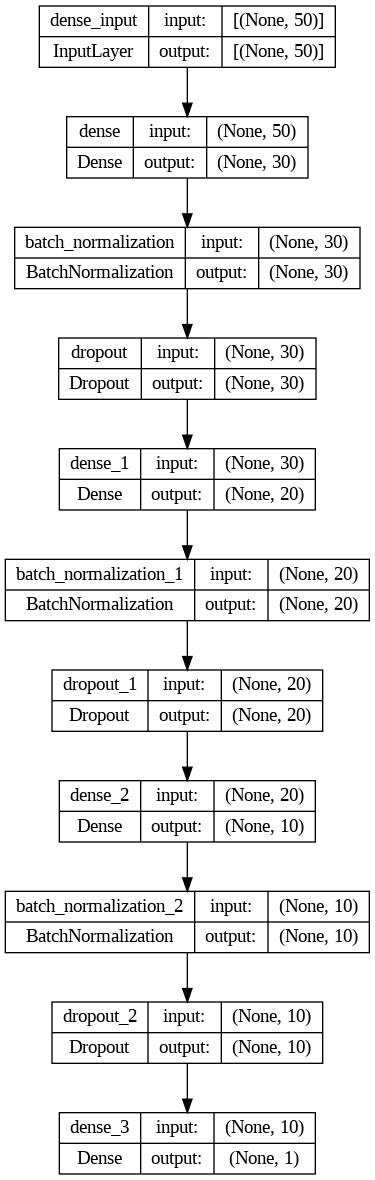

In [24]:
plot_model(model_seq, show_shapes=True)

In [25]:
# Metrics =[ tf.keras.metrics.BinaryCrossentropy,
#           tf.keras.metrics.BinaryAccuracy.....


# ]
model_seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [28]:
model_seq.fit(x_train, y_train, epochs=20, batch_size=1000, verbose=1, class_weight=cw_dict)

Epoch 1/20
54/54 [==============================] - 0s 7ms/step - loss: 0.5535 - acc: 0.8098
Epoch 2/20
54/54 [==============================] - 0s 8ms/step - loss: 0.5545 - acc: 0.8054
Epoch 3/20
54/54 [==============================] - 0s 8ms/step - loss: 0.5619 - acc: 0.8032
Epoch 4/20
54/54 [==============================] - 0s 7ms/step - loss: 0.5575 - acc: 0.8100
Epoch 5/20
54/54 [==============================] - 0s 8ms/step - loss: 0.5528 - acc: 0.8083
Epoch 6/20
54/54 [==============================] - 0s 7ms/step - loss: 0.5565 - acc: 0.8056
Epoch 7/20
54/54 [==============================] - 0s 8ms/step - loss: 0.5528 - acc: 0.8043
Epoch 8/20
54/54 [==============================] - 0s 7ms/step - loss: 0.5555 - acc: 0.8074
Epoch 9/20
54/54 [==============================] - 0s 7ms/step - loss: 0.5534 - acc: 0.8055
Epoch 10/20
54/54 [==============================] - 0s 8ms/step - loss: 0.5570 - acc: 0.8113
Epoch 11/20
54/54 [==============================] - 1s 15ms/step - l

In [29]:
# Keras.utils
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,Callback

In [30]:
earlystop =EarlyStopping(monitor='loss', patience=5)

In [31]:
filepath='/content/model_output'+'/weights-{epoch:02d}-{loss:4f}.h5'
checkpoint=ModelCheckpoint(filepath=filepath,
                           save_weights_only=True,
                           monitor='val_loss',
                           mode='min',
                           save_best_only=False,
                           save_freq=50

                           )

In [36]:
class my_custom_callback(Callback):
  def __init__(self,features,target):
    self.test_data=(features,target)
    self.auc=[]

  def on_epoch_end(self,epoch,logs=None):
    y_pred=self.model.predict(self.test_data[0])
    auc=roc_auc_score(self.test_data[1], y_pred)
    print(' \n auc score for val set :' ,auc, '\n')
    self.auc.append((epoch,auc))
    return

mycallback=my_custom_callback(x_test,y_test)

In [37]:
model_seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [38]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1530      
                                                                 
 batch_normalization (Batch  (None, 30)                120       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 batch_normalization_1 (Bat  (None, 20)                80        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 20)                0

In [40]:
model_seq.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=1, class_weight=cw_dict,
              validation_data=(x_test,y_test),callbacks=[mycallback,earlystop,checkpoint]


              )

Epoch 1/2000
419/419 [==============================] - 1s 2ms/step
 
 auc score for val set : 0.819367490384321 

54/54 [==============================] - 1s 27ms/step - loss: 0.5521 - acc: 0.8080 - val_loss: 0.5568 - val_acc: 0.7993
Epoch 2/2000
419/419 [==============================] - 1s 2ms/step
 
 auc score for val set : 0.8275162237339019 

54/54 [==============================] - 2s 29ms/step - loss: 0.5498 - acc: 0.8059 - val_loss: 0.4316 - val_acc: 0.8567
Epoch 3/2000
419/419 [==============================] - 1s 2ms/step
 
 auc score for val set : 0.8249026614711455 

54/54 [==============================] - 2s 35ms/step - loss: 0.5532 - acc: 0.8090 - val_loss: 0.4690 - val_acc: 0.8330
Epoch 4/2000
419/419 [==============================] - 1s 2ms/step
 
 auc score for val set : 0.8232607022012515 

54/54 [==============================] - 2s 34ms/step - loss: 0.5497 - acc: 0.8106 - val_loss: 0.4583 - val_acc: 0.8384
Epoch 5/2000
419/419 [==============================] - 1